# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Panca Adnan Andrian
- Email:acari.panca21@gmail.com
- Id Dicoding:izrael

## Persiapan

#### pertanyaan: 
1. **Profil Karyawan yang Keluar**:
 - Berapa banyak karyawan yang keluar berdasarkan berbagai demografi seperti usia, jenis kelamin, dan tingkat pendidikan?
 - Departemen atau divisi mana yang memiliki tingkat attrition tertinggi?
 - Berapa lama rata-rata karyawan bertahan sebelum mereka keluar?

2. **Faktor Pekerjaan dan Lingkungan Kerja**:
 - Bagaimana tingkat gaji dan tunjangan mempengaruhi tingkat attrition?
 - Apakah ada pola pada jam kerja, lembur, atau beban kerja yang mempengaruhi keputusan karyawan untuk keluar?
 - Bagaimana keterlibatan karyawan dan kepuasan kerja terkait dengan attrition rate?



### Menyiapkan library yang dibutuhkan

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

### Menyiapkan data yang akan diguankan

In [9]:
df = pd.read_csv('../submission/employee/employee_data.csv')

## Data Understanding

In [11]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [13]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
# Menghitung jumlah data 'Attrition' yang bernilai 1 dan 0
attrition_counts = df['Attrition'].value_counts()

# Menampilkan hasil perhitungan
print("Jumlah data 'Attrition':")
print(attrition_counts)

Jumlah data 'Attrition':
Attrition
0.0    879
1.0    179
Name: count, dtype: int64


In [15]:
null_count_attrition = df['Attrition'].isnull().sum()
print(f"Jumlah nilai null di kolom 'Attrition': {null_count_attrition}")
print("\nBaris yang memiliki nilai null di kolom 'Attrition':")
df[df['Attrition'].isnull()].head()


Jumlah nilai null di kolom 'Attrition': 412

Baris yang memiliki nilai null di kolom 'Attrition':


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,1,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,1,...,3,80,2,7,6,3,7,7,0,7


In [16]:

# Mengganti nilai NaN di kolom 'Attrition' dengan 0
df['Attrition'].fillna(0, inplace=True)
df['Attrition'] =df['Attrition'].astype(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

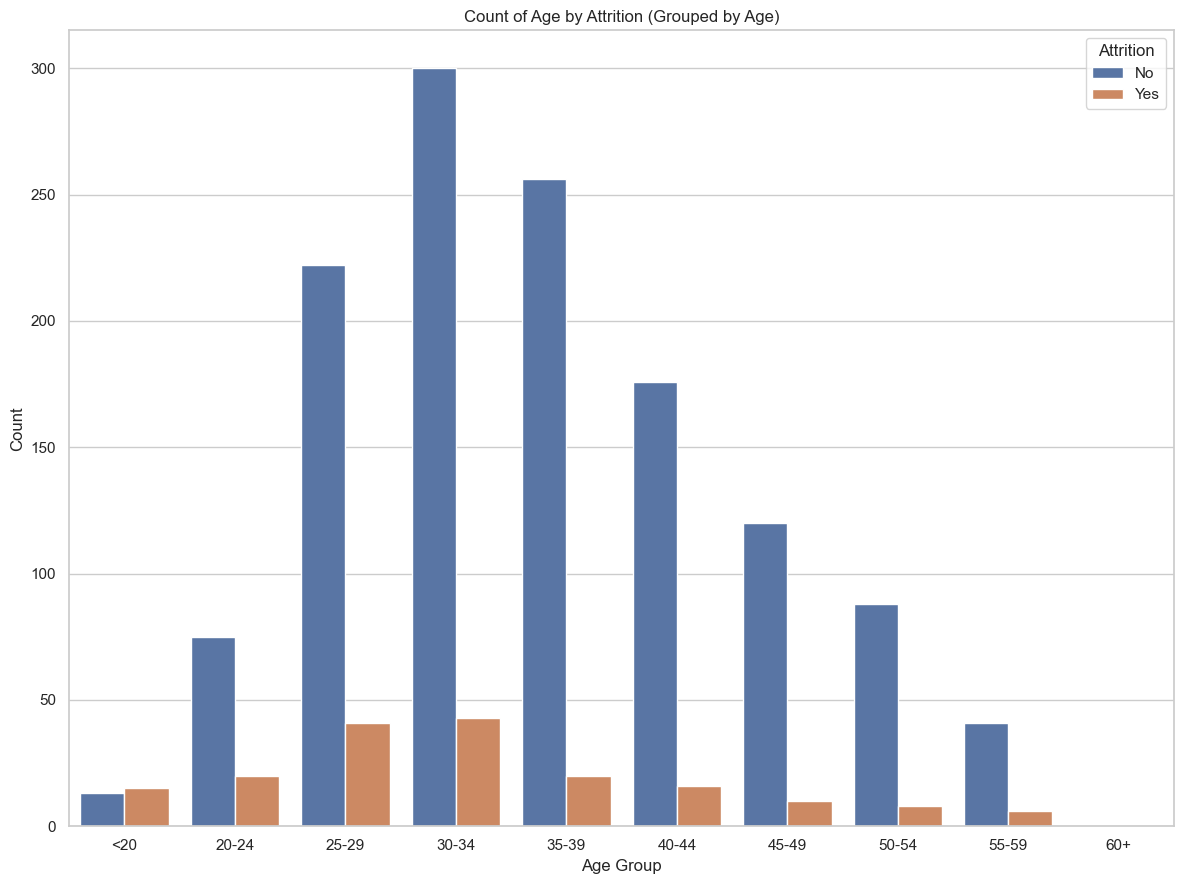

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Contoh dataframe (ganti dengan dataframe yang sebenarnya)
# df = pd.read_csv('nama_file.csv')
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ['<20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+']
# Membuat kolom baru untuk grup umur dengan interval yang lebih spesifik
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, 
                        labels=labels).astype('object')

# Set style
sns.set(style="whitegrid")

# Plot count plot
plt.figure(figsize=(12, 9))
sns.countplot(data=df, x='AgeGroup', hue='Attrition', 
              order=labels)
plt.title('Count of Age by Attrition (Grouped by Age)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


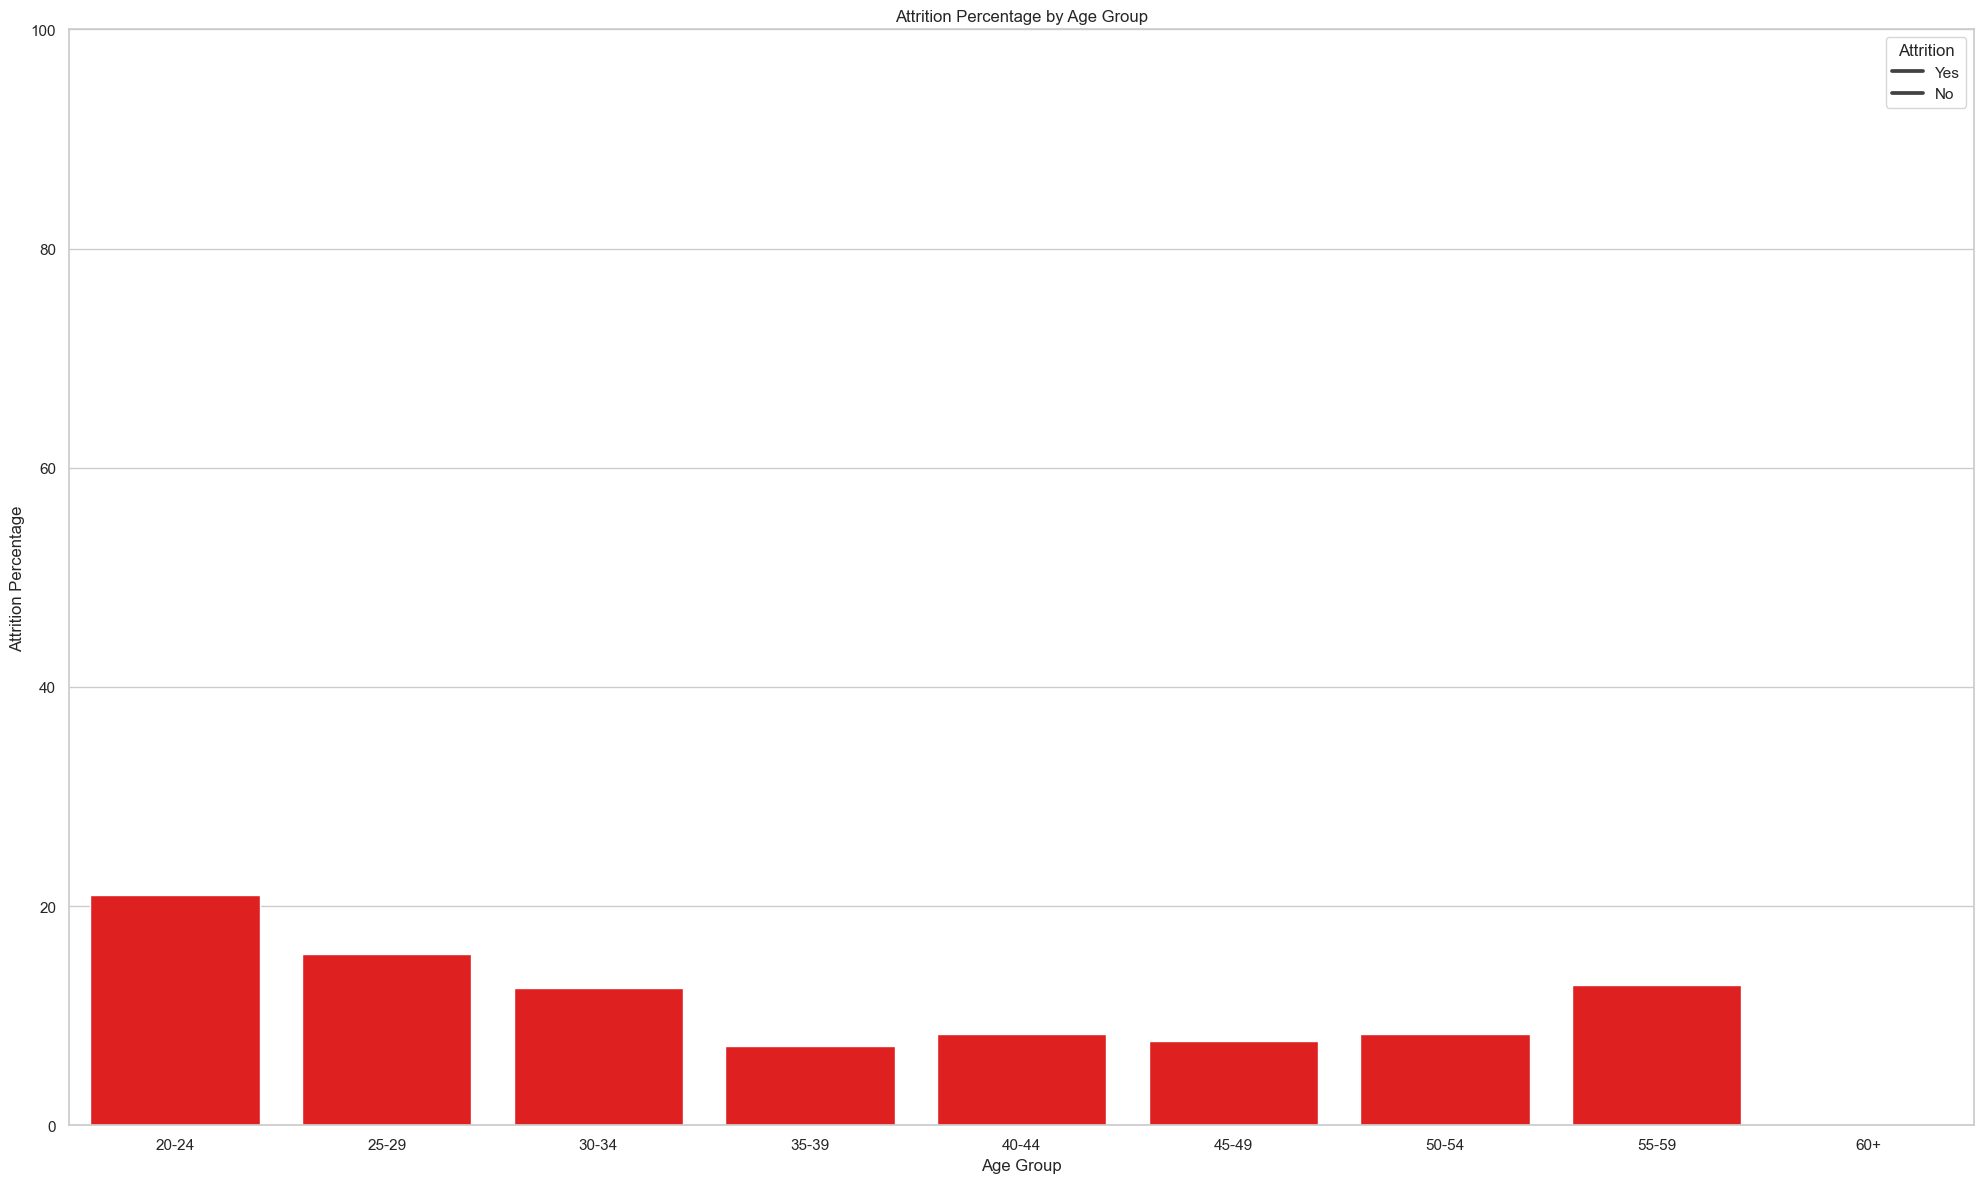

In [19]:
# Menghitung jumlah Attrition dan total karyawan untuk setiap AgeGroup
age_group_counts = df.groupby(['AgeGroup', 'Attrition']).size().unstack()
age_group_counts['Total'] = age_group_counts.sum(axis=1)

# Normalisasi Attrition_Percentage agar total menjadi 100%
age_group_counts[["0.0", "1.0"]] = age_group_counts[["0.0", "1.0"]].div(age_group_counts['Total'], axis=0) * 100

age_group_counts.reset_index(inplace=True)
age_group_counts.head()
# Plot bar plot untuk persentase Attrition
plt.figure(figsize=(20, 12))
sns.barplot(data=age_group_counts, x='AgeGroup', y="1.0", order=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+'], color='red')

plt.title('Attrition Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Percentage')
plt.ylim(0, 100)

# Menambahkan label dan legend
plt.legend(title='Attrition', loc='upper right', labels=['Yes', 'No'])

plt.tight_layout()
plt.show()

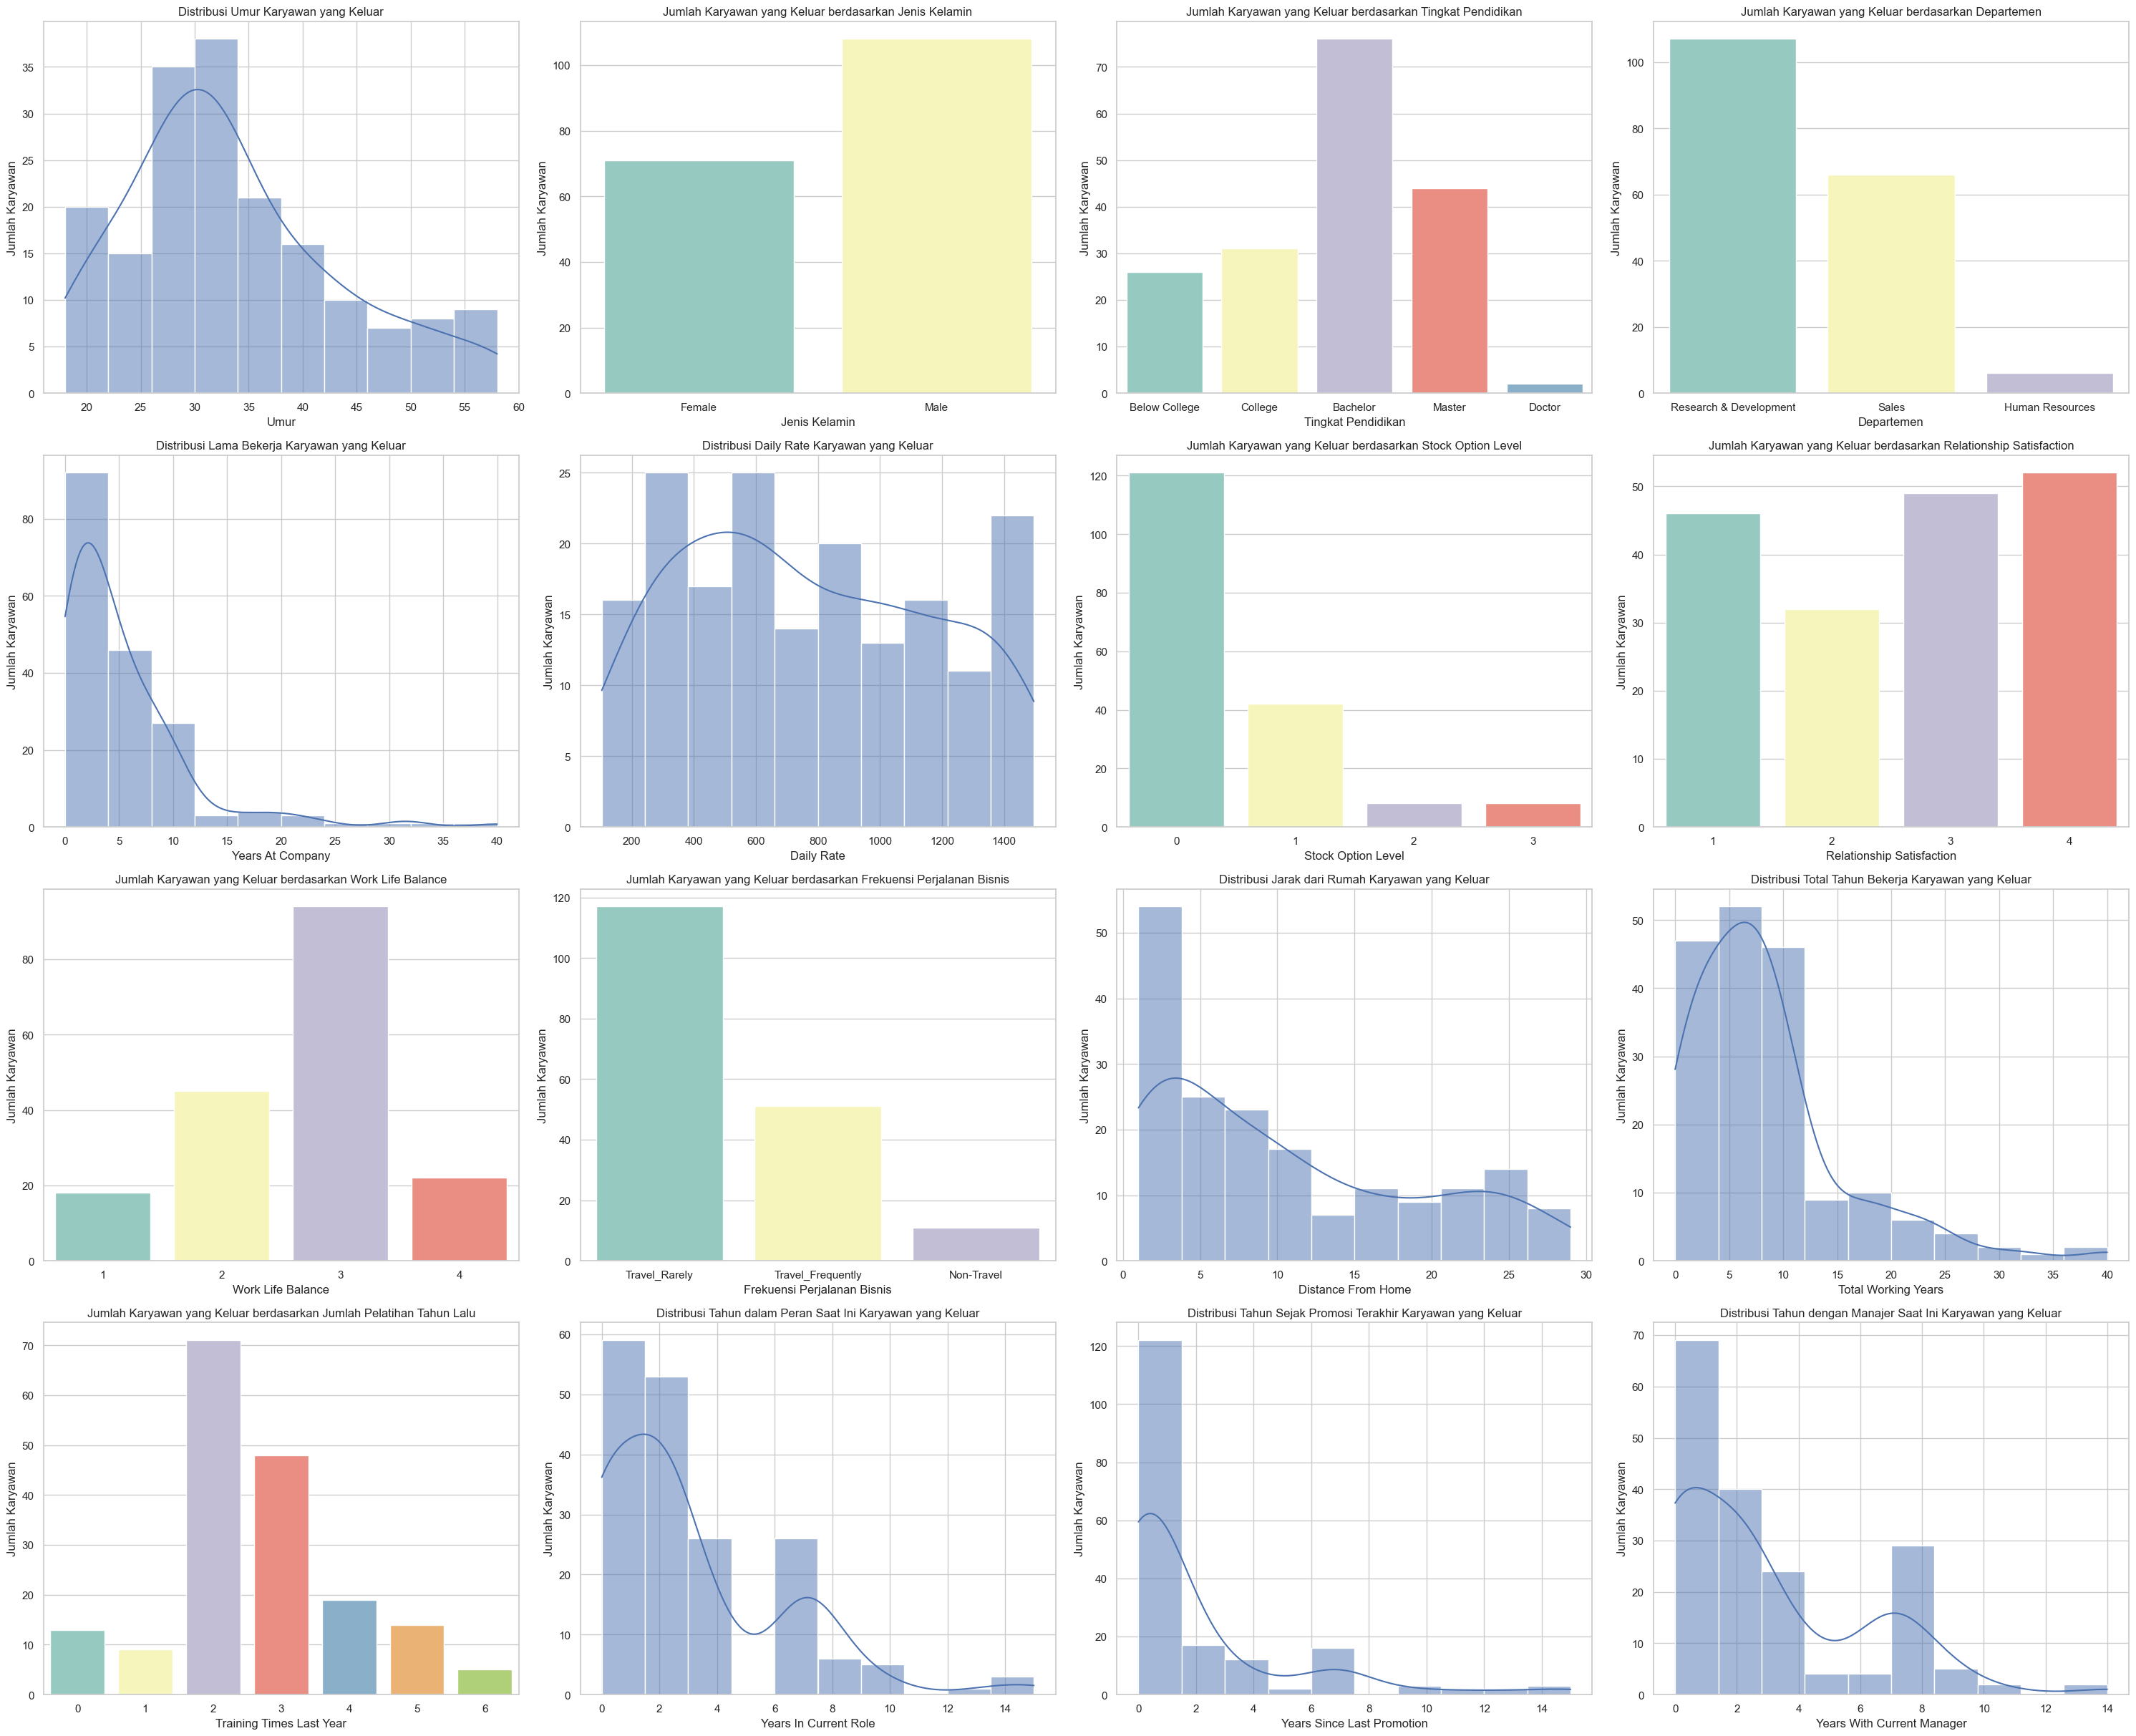

In [20]:
# Daftar kolom dan judul untuk plot
plots_info = [
    {'column': 'Age', 'type': 'hist', 'title': 'Distribusi Umur Karyawan yang Keluar', 'xlabel': 'Umur'},
    {'column': 'Gender', 'type': 'count', 'title': 'Jumlah Karyawan yang Keluar berdasarkan Jenis Kelamin', 'xlabel': 'Jenis Kelamin'},
    {'column': 'Education', 'type': 'count', 'title': 'Jumlah Karyawan yang Keluar berdasarkan Tingkat Pendidikan', 'xlabel': 'Tingkat Pendidikan'},
    {'column': 'Department', 'type': 'count', 'title': 'Jumlah Karyawan yang Keluar berdasarkan Departemen', 'xlabel': 'Departemen'},
    {'column': 'YearsAtCompany', 'type': 'hist', 'title': 'Distribusi Lama Bekerja Karyawan yang Keluar', 'xlabel': 'Years At Company'},
    {'column': 'DailyRate', 'type': 'hist', 'title': 'Distribusi Daily Rate Karyawan yang Keluar', 'xlabel': 'Daily Rate'},
    {'column': 'StockOptionLevel', 'type': 'count', 'title': 'Jumlah Karyawan yang Keluar berdasarkan Stock Option Level', 'xlabel': 'Stock Option Level'},
    {'column': 'RelationshipSatisfaction', 'type': 'count', 'title': 'Jumlah Karyawan yang Keluar berdasarkan Relationship Satisfaction', 'xlabel': 'Relationship Satisfaction'},
    {'column': 'WorkLifeBalance', 'type': 'count', 'title': 'Jumlah Karyawan yang Keluar berdasarkan Work Life Balance', 'xlabel': 'Work Life Balance'},
    {'column': 'BusinessTravel', 'type': 'count', 'title': 'Jumlah Karyawan yang Keluar berdasarkan Frekuensi Perjalanan Bisnis', 'xlabel': 'Frekuensi Perjalanan Bisnis'},
    {'column': 'DistanceFromHome', 'type': 'hist', 'title': 'Distribusi Jarak dari Rumah Karyawan yang Keluar', 'xlabel': 'Distance From Home'},
    {'column': 'TotalWorkingYears', 'type': 'hist', 'title': 'Distribusi Total Tahun Bekerja Karyawan yang Keluar', 'xlabel': 'Total Working Years'},
    {'column': 'TrainingTimesLastYear', 'type': 'count', 'title': 'Jumlah Karyawan yang Keluar berdasarkan Jumlah Pelatihan Tahun Lalu', 'xlabel': 'Training Times Last Year'},
    {'column': 'YearsInCurrentRole', 'type': 'hist', 'title': 'Distribusi Tahun dalam Peran Saat Ini Karyawan yang Keluar', 'xlabel': 'Years In Current Role'},
    {'column': 'YearsSinceLastPromotion', 'type': 'hist', 'title': 'Distribusi Tahun Sejak Promosi Terakhir Karyawan yang Keluar', 'xlabel': 'Years Since Last Promotion'},
    {'column': 'YearsWithCurrManager', 'type': 'hist', 'title': 'Distribusi Tahun dengan Manajer Saat Ini Karyawan yang Keluar', 'xlabel': 'Years With Current Manager'}
]

# Mengatur ukuran plot secara keseluruhan
plt.figure(figsize=(30, 30))

# Loop untuk membuat plot
for i, info in enumerate(plots_info, 1):
    plt.subplot(5, 4, i)
    if info['type'] == 'hist':
        sns.histplot(data=df[df['Attrition'] == "1.0"], x=info['column'], bins=10, kde=True)
    elif info['type'] == 'count':
        sns.countplot(data=df[df['Attrition'] == "1.0"], x=info['column'], palette='Set3')
    
    plt.title(info['title'])
    plt.xlabel(info['xlabel'])
    plt.ylabel('Jumlah Karyawan')

    # Custom ticks for Education column
    if info['column'] == 'Education':
        plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

# Menampilkan plot
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

In [22]:

# Encoding variabel kategorikal
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Memisahkan fitur dan target
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Modeling

In [24]:
# Membuat model Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

## Evaluation

In [26]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

# Menampilkan laporan klasifikasi
print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

# Menampilkan matriks kebingungan
print('Matriks Kebingungan:')
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.90
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       262
           1       0.58      0.22      0.32        32

    accuracy                           0.90       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.88      0.90      0.88       294

Matriks Kebingungan:
[[257   5]
 [ 25   7]]


In [27]:


# Membuat model ensemble
ensemble_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=100)),
    ('rf', RandomForestClassifier(random_state=100)),
    ('gb', GradientBoostingClassifier(random_state=100))
], voting='soft')

# Fit model ke data latih
ensemble_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_ensemble = ensemble_model.predict(X_test)

# Menghitung akurasi
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Akurasi: {accuracy_ensemble:.2f}')

# Menampilkan laporan klasifikasi
print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred_ensemble))

# Menampilkan matriks kebingungan
print('Matriks Kebingungan:')
print(confusion_matrix(y_test, y_pred_ensemble))


Akurasi: 0.90
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       262
           1       0.67      0.12      0.21        32

    accuracy                           0.90       294
   macro avg       0.78      0.56      0.58       294
weighted avg       0.88      0.90      0.87       294

Matriks Kebingungan:
[[260   2]
 [ 28   4]]
